# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 14. Линейная алгебра


## Раздел 1. Работа с матрицами

Прежде, чем переходить к каким-то осмысленным вещам, давайте вспомним и закрепим на практике, что представляют собой такие математические объекты, как матрица и вектор, а также то, как с этими объектами можно работать в Python.

In [1]:
# Импортируем все библиотеки, которые нам сегодня понадобятся
import os

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# Настроим библиотеки отрисовки
%matplotlib inline

sns.set(font_scale=1.3)

red   = '#FF3300'
blue  = '#0099CC'
green = '#00CC66'

Итак, давайте вспомним, как же работать с матрицами и векторами в Numpy!

In [3]:
# Создадим при помощи numpy две матрицы 2х2, одну матрицу 2х3, два вектора длины 2 и один вектор длины 3 с произвольными числами

A = np.array([[1,2],
              [3,-4]])
B = np.array([[2, 0],
              [0, 1]])
C = np.array([[1, -2, 0],
              [3, 0, -1]])

x = np.array([1, -1])
y = np.array([2, 1])
z = np.array([1, 4, 2])

### Умножение матриц и векторов

Умножение матриц и векторов — одна из ключевых операций в линейной алгебре. Попробуйте потренироваться с умножением на листке бумаги, прежде чем переходить к коду ниже.

Давайте вместе с вами осуществим:

1. Поэлементное умножение матриц А и В
2. Математическое умножение матрицы А на В
3. Математическое умножение матрицы А на С
4. Математическое умножение матрицы С на А
5. Умножение матрицы A на вектор x справа и слева математически
6. Умножение матрицы C на вектор z справа и слева математически
7. Скалярное произведение векторов x и y

Посчитаем, что получится при поэлементном умножении матриц A и B (`*`)

In [ ]:
A * B

Посчитаем, что получится при математическом умножении матриц A и B (`@` или `np.dot`)

In [ ]:
A @ B

Посчитаем, что получится при математическом умножении матриц A и C (`@` или `np.dot`)

In [ ]:
A @ C

Получится ли умножить матрицу C на матрицу A?

In [ ]:
C @ A

Умножим матрицу A на вектор x справа и слева математически (`@` или `np.dot`)

In [ ]:
A @ x

In [ ]:
x @ A

Умножим матрицу C на вектор z справа математически (`@` или `np.dot`)

In [ ]:
C @ z

Получится ли у нас умножить слева?

In [ ]:
z @ C

 Умножим математически вектор x и y

In [ ]:
x @ y

Если хочется еще что-то поумножать, то можем попрактиковаться :)

### Полезные матрицы

Иногда в анализе данных возникает необходимость использовать специальные матрицы

Единичная матрица (`np.eye`)

In [ ]:
np.eye(3)

Матрица из единиц (`np.ones`). Кстати, не путаем с предыдущим, да?

In [ ]:
np.ones((3, 3))

Матрица из нулей (`np.zeros`)

In [ ]:
np.zeros((3, 3))

Диагональная матрица (`np.diag`)

In [ ]:
np.diag([1, 2, 3])

### Полезные функции

Ну и, конечно, вспомним важные функции и операции с матрицами, которые потребуются нам при дальнейшей работе (в частности, при разговоре о матричных разложениях)

#### Задания для самостоятельного решения (матричные функции)

Реализуйте программно следующие операции с матрицами, используя библиотеку `numpy`:

1) Посчитайте определители матриц A и B. Что насчет матрицы С?

2) Найдите собственные значения и собственные вектора для матриц А и В. Что насчет матрицы С?

3) Вычислите обратную матрицу для матрицы А и В. Что насчет матрицы С? Проверьте, что найденные матрицы действительно являются обратными к исходным.

In [ ]:
# your code here

**Решение:**

Определитель [применим на матрицы A и B] (`np.linalg.det`)

In [ ]:
np.linalg.det(A)

In [ ]:
np.linalg.det(B)

Что если применить на матрице C:

In [ ]:
np.linalg.det(C)

Собственные вектора и значения [применим на матрицу B] (`np.linalg.eig`)

In [ ]:
np.linalg.eig(B)

Можно ли применить на матрицу C?

In [ ]:
np.linalg.eig(C)

Обратная матрица [применим на матрицы A и B] (`np.linalg.inv`)

In [ ]:
np.linalg.inv(A)

In [ ]:
np.linalg.inv(B)

Проверим, что она действительно обратная. Как мы можем это сделать?

In [ ]:
np.linalg.inv(A) @ A

In [ ]:
np.linalg.inv(B) @ B

Что насчет матрицы С?

In [ ]:
np.linalg.inv(C)

## Раздел 2. SVD

Для того, чтобы ручками потрогать SVD-разложение, воспользуемся его реализацией в scipy на примере сгенерированного датасета.

In [4]:
# Сгенерируем матрицу размера 100 на 10 из нормального распределения при помощи функции normal модуля random
X = np.random.normal(size=(100, 10))
print(X.shape)

(100, 10)


In [5]:
X

array([[-1.55025947e+00,  8.06734835e-02,  5.28400319e-01,
        -8.39323352e-02, -2.01636137e-01,  1.95089345e-01,
        -1.67389490e+00,  7.56475653e-01, -7.00439768e-01,
         1.19867986e+00],
       [-1.50424809e-01, -6.11901791e-01, -2.44687668e+00,
        -2.29502757e+00,  1.60237532e+00, -2.38149037e-01,
        -1.17476588e+00, -5.96952926e-01,  5.30367982e-02,
        -5.46780461e-01],
       [-7.12537949e-02, -8.32433101e-01,  1.04676297e+00,
         8.14419700e-01,  1.80196181e-01, -7.86676525e-01,
        -2.75008671e+00,  2.74103958e-01,  1.83485014e+00,
        -1.48496187e+00],
       [ 1.69585965e+00,  2.01202650e+00,  1.14994723e+00,
        -1.39199559e+00,  9.57191207e-01, -1.04326524e+00,
         1.83920543e-02, -2.23144659e-01, -1.71461499e+00,
         4.70403719e-01],
       [ 1.01726085e-01, -1.49629716e+00,  1.02469422e+00,
         1.42517230e+00, -1.57739733e+00, -5.00688347e-01,
        -1.94784324e+00,  8.07655293e-01,  2.96616500e+00,
        -4.

Воспользуемся функцией `svd` модуля `linalg` библиотеки `scipy` для того, чтобы получить SVD-разложение нашей матрицы X

In [6]:
U, D, V = sp.linalg.svd(X, full_matrices=False)
print(U.shape, D.shape, V.shape)

(100, 10) (10,) (10, 10)


#### Вопрос

Что из себя представляет параметр `full_matrices=False`?

Посмотрим, что из себя представляет матрица D

In [7]:
D

array([12.95011036, 11.99477812, 11.00062852, 10.77023187, 10.47068516,
        9.99353217,  9.55307033,  9.12110753,  8.28523619,  7.2080039 ])

Переведем D в матричный вид при помощи умножения на единичную матрицу поэлементно (`*`)

In [8]:
print(D * np.eye(10))

[[12.95011036  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         11.99477812  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         11.00062852  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         10.77023187  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         10.47068516  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          9.99353217
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   9.55307033  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          9.12110753  0.          0.        ]
 [ 0.          0.          0.          0.          0.   

Проверим, что SVD работает верно, умножив последовательно матрицы U, D и V

In [9]:
X_restored = U @ (D * np.eye(10)) @ V

np.allclose(X_restored, X)

True

Восстановленная версия действительно очень близка к исходной. Ура!

## Раздел 3. PCA



Интерактивная визуализация PCA и собственных векторов:

* <a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

* <a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>




Реализация из sklearn:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA">`sklearn.decomposition.PCA`</a>`(n_components=None)`

Методы класса:
* `fit(X)` — обучиться на данных `X`;
* `fit_transforn(X)` — обучиться на данных `X` и вернуть сжатое представление `X`;
* `transform(X_new)` — вернуть сжатое представление `X_new` для обученной ранее модели;
* `inverse_transform(Y)` — восстановить сжатые данные `Y` в исходное пространство.

Атрибуты класса:

* `components_` — главные компоненты в порядке убывания собственных чисел, размер (n_components, n_features);
* `explained_variance_` — дисперсия вдоль главных компонент, равны собственным числам, размер (n_components,);
* `explained_variance_ratio_` —- доля дисперсии, объясняемая каждой компонентой, размер (n_components,);
* `mean_` — среднее по данным, размер (n_components,);
* `noise_variance_` — оценка дисперсии шума для метода Probabilistic PCA.

Другие модификации, реализованные в sklearn:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA">`KernelPCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA">`SparsePCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA">`IncrementalPCA`</a>.

Для демонстрации работы PCA сгенерируем двумерный датасет из нормального распределения.

Сделать это можно при помощи функции `multivariate_normal` из модуля `random` библиотеки `numpy`. Например, матрица размера 150, со средними `[0, 3]` и ковариацией `[[3, 1], [1, 1]]`

In [84]:
np.random.seed(2024)

In [85]:
X = np.random.multivariate_normal(size=150, mean=[0, 3], cov=[[3, 1], [1, 1]])

#### Вопрос

Почему мы просто не воспользовались `np.random.normal`, как в прошлом примере?



Итак, посмотрим, что матрица действительно того размера, который мы предполагали

In [86]:
X.shape

(150, 2)

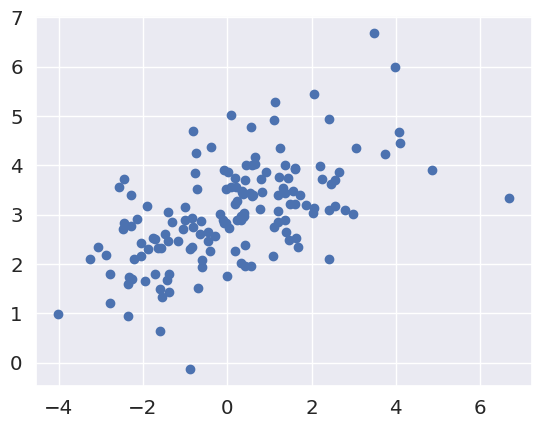

In [87]:
plt.scatter(X[:, 0], X[:, 1])

Создадим объект класса PCA.

Кстати, какое число компонент у PCA будет осмысленно в нашем случае?

In [88]:
pca = PCA(n_components=1)

Обучим и преобразуем нашу матрицу X при помощи метода `fit_transform`

In [89]:
Y = pca.fit_transform(X)

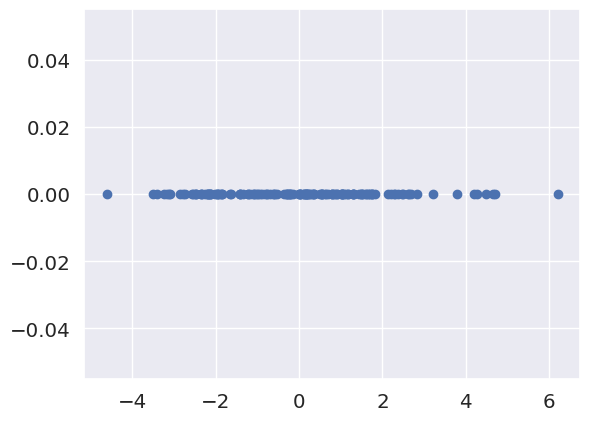

In [90]:
plt.scatter(Y, np.zeros(Y.shape))

Преобразуем наши данные в исходный размер при помощи метода `inverse_transform`

Кстати, прокомментируйте, как этот метод работает (исходя из того, что мы обсуждали про SVD)


Понять работу обратного преобразования можно следующим образом: если SVD возвращает `U`, `S`, `V`, причем `U @ S` — это PCA-преобразование, то в таком случае умножение еще и на `V`, будет как раз являться обратным преобразованием

In [91]:
X_hat = pca.inverse_transform(Y)

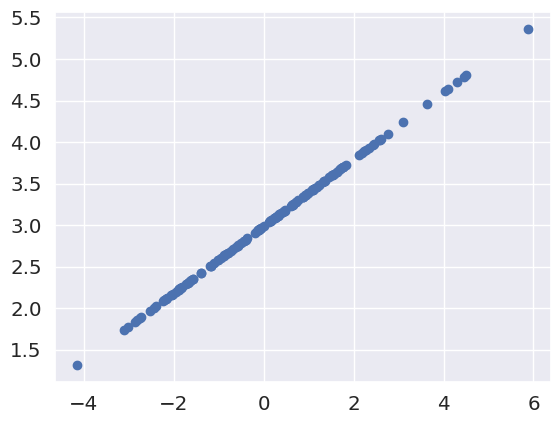

In [92]:
plt.scatter(X_hat[:, 0], X_hat[:, 1])

Вопрос на внимательность: какие размеры сейчас у матриц `X`, `Y` и `X_hat`?

In [93]:
print(X.shape)
print(Y.shape)
print(X_hat.shape)

(150, 2)
(150, 1)
(150, 2)


Посмотрим на главные компоненты (точнее, одну компоненту) при помощи переменной `components_`

In [94]:
pca.components_

array([[0.9273152 , 0.37428134]])

Построим следующие графики:
* На первом графике синим отмечены исходные точки, красным — они же, после проецирования и обратного преобразования.

* На втором графике — точки, спроецированные на главную компоненту в одномерном пространстве. Иными словами распределение точек вдоль главной компоненты.

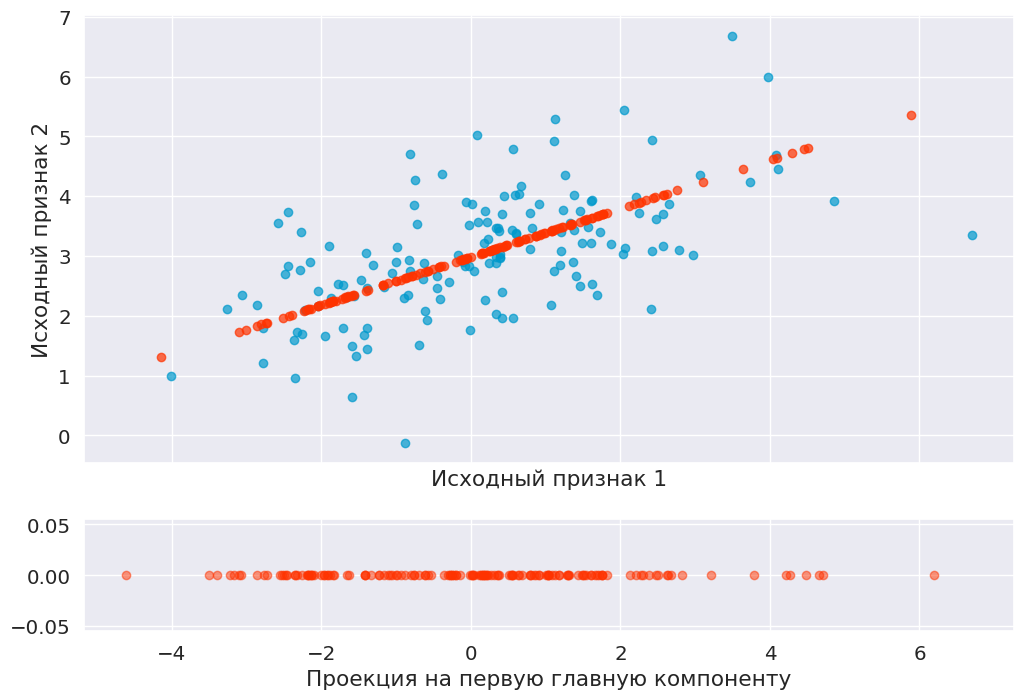

In [96]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, воспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор Y
# а в качестве координат по оси y нули
axes[1].scatter(Y, np.zeros(len(Y)), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

Другие методы снижения размерности:

* http://scikit-learn.org/stable/modules/manifold.html#manifold

Примеры с визуализацией:

* http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

* http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py

## Раздел 4. Cжатие изображений с помощью PCA

Скачаем картинку

In [97]:
! wget https://www.dropbox.com/s/ehhrw5l46rpnv61/3840x2400.png

--2025-04-01 11:42:17--  https://www.dropbox.com/s/ehhrw5l46rpnv61/3840x2400.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nv6xlsd6m7jatkaje52yl/3840x2400.png?rlkey=jaq1zzkqpl2053cen752j3oou [following]
--2025-04-01 11:42:17--  https://www.dropbox.com/scl/fi/nv6xlsd6m7jatkaje52yl/3840x2400.png?rlkey=jaq1zzkqpl2053cen752j3oou
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1d45ba2508147847be381e237.dl.dropboxusercontent.com/cd/0/inline/Cm_7wA3Lg9CG1UTxE1_fSkLMvGl7Ql9brr0rJdVh9Gre6m5qVgR_4R5e1OOx08qyl9YDapNmS23q-MK3u-wklQBlUN_-qg0bOg6UikqC637F7DhFDO4qWTNmoKf_kspSfkbmu5fU7wGbAgX4lPNpmLw9/file# [following]
--2025-04-01 11:42:18--  https://uce1d45ba2508147847be381e237.dl.dropboxusercontent.com/cd/0/inlin

Считаем картинку при помощи функции `imread` библиотеки `matplotlib` (кстати, запомните ее — нам это еще понадобится в будущем!)

In [98]:
image = plt.imread('3840x2400.png')

Посмотрим какой размер у изображения

In [99]:
image.shape

(2400, 3840, 3)

Почему размерность именно такая? За что отвечает каждое измерение?

Вот, что из себя представляет image:

In [100]:
image[1600, 1000]

array([0.39215687, 0.10980392, 0.11372549], dtype=float32)

Отрисуем картику при помощи функции `imshow` библиотеки `matplotlib` (эту — тоже запоминаем обязательно)

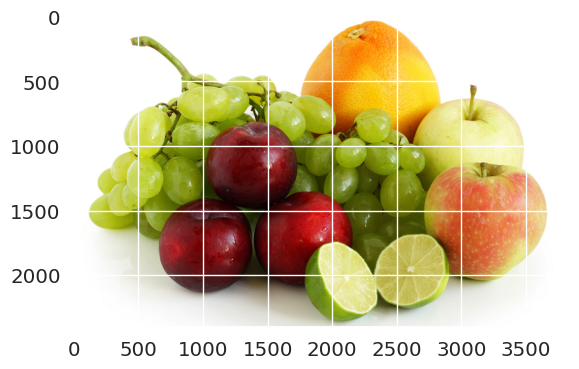

In [101]:
plt.imshow(image)

Итак, что же теперь предлагается сделать?

Давайте разобьем наше изображение на 24 равных кусочка (нарежем изображение на равные части).

Применим к картинке преобразования для выделения 24 блоков размера 600x640, то есть из массива размером `(2400, 3840, 3)` получим массив размером `(24, 600, 640, 3)`. Делаем мы всё это для того, чтобы потом каждый кусочек растянуть в один вектор и в конечном итоге получить массив размером `(24, 600 * 640 * 3)`

Для реализации такого преобразования мы будем использовать простую логику: если мы какую-то размерность хотим разделить (например, из 2400 сделать 4 и 600), то мы должны перенести ее в конец; и если мы, наоборот, хотим соединить две размерности (например, из 4 и 600 сделать 2400), то мы также должны перенести их обе в конец и установить друг за другом.

При реализации нашего плана нам потребуются две функции:
* Для переноса размерностей используют метод `transpose(<на какую позицию переместить нулевую размерность>, <на какую позицию переместить первую размерность>, и т.д.)`;
* Для склейки и разделения размерностей используют метод `reshape(<новый размер>)`.

Ниже описано пошаговое применение этих функций для нашей картинки.


Размерность изначального изображения:

In [102]:
image.shape

(2400, 3840, 3)

Размерность после перестановки нулевой оси на первую позицию, первой на вторую, а вторую на нулевую:

In [103]:
image.transpose((1, 2, 0))\
    .shape

(3840, 3, 2400)

Разбиваем высоту и смотрим размерность:

In [104]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .shape

(3840, 3, 4, 600)

Переставляем размерности, чтобы разбить ширину, и смотрим размерность:

In [105]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .shape

(3, 4, 600, 3840)

Разбиваем ширину и смотрим размерность:

In [106]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .shape

(3, 4, 600, 6, 640)

Переставляем размерности, чтобы затем их "схлопнуть":

In [107]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .shape

(4, 6, 600, 640, 3)

И, наконец, склеиваем размерности, чтобы получить 24 строки:

In [108]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .reshape((4 * 6, 600 * 640 * 3))\
    .shape

(24, 1152000)

Ура, мы справились с этой довольно сложной задачей! Давайте теперь соберем все вместе.

In [109]:
X = image.transpose((1, 2, 0))\
         .reshape((3840, 3, 4, 600)) \
         .transpose((1, 2, 3, 0))\
         .reshape((3, 4, 600, 6, 640)) \
         .transpose((1, 3, 2, 4, 0))\
         .reshape((4 * 6, 600 * 640 * 3))
print(X.shape)

(24, 1152000)


На самом деле, мы получили в некотором смысле матрицу объект-признак для нашего изображения. Ведь если так подумать, объектом для картинки является ее кусочек, а признаками — какое-то представление каждого кусочка. Именно такую структуру фактически и репрезентует наша итоговая матрица X!

Давайте теперь визуализируем получившиеся блоки, чтобы понять, что мы нигде не ошиблись — если у нас в итоге сложится целостная картинка, то это будет означать, что все сделано абсолютно верно!

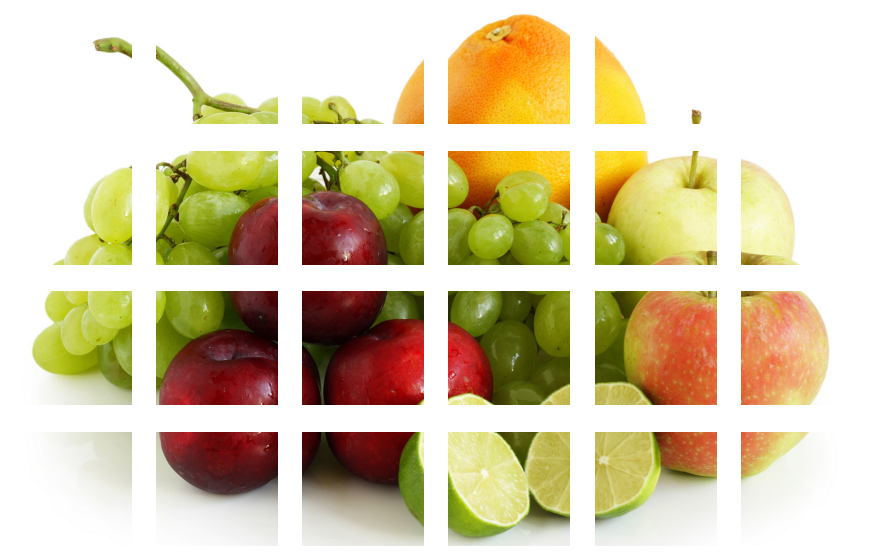

In [110]:
plt.figure(figsize=(11, 7))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(X[i].reshape((600, 640, 3)))
    plt.axis('off');

Очевидно, все сделано правильно. Мы молодцы!

Теперь же, когда мы научились преобразовывать изображение нужным образом в блоки (кстати, а зачем все-таки мы это делали?), давайте перейдем к основной части — применению PCA к данным.

Воспользуемся следующими функциями, чтобы исследовать влияние выбора числа главных компонент на качество изображения. Действительно, вспомните: мы ведь можем выбрать число компонент, которое хотим оставить (тем самым усекая матрицы в SVD-разложении), а затем возвращаться в исходные размеры, просто домножая всё на третью усеченую матрицу SVD.

In [111]:
# Итак, посмотрим, что делают предложенные функции

def draw_components(pca, n, m):
    """
    Функция отрисовывает главные компоненты по обученной PCA модели

    pca - обученная PCA модель
    n - количество горизонтальных блоков картинки
    m - количество вертикальных блоков картинки
    """
    print('Среднее изображение')
    plt.figure(figsize=(1, 1))
    plt.imshow(pca.mean_.reshape((n, m, 3)), cmap='gray')
    plt.axis('off')
    plt.show()

    print('Главные компоненты')
    plt.figure(figsize=(11, len(pca.components_) // 10 + 1))
    for i, comp in enumerate(pca.components_):
        plt.subplot(len(pca.components_) // 10 + 1, 10, i + 1)
        img = pca.components_[i].reshape((n, m, 3))
        plt.imshow((img - img.min()) / (img.max() - img.min()), cmap='gray')
        plt.axis('off')
    plt.show()


def image_pca(image, n, m, n_components=20, draw_picture=True,
              draw_comp=True, visualization=True):
    """
    Функция сжимает изображение согласно заданному числу главных компонент, а затем
    возвращает в исходный вид и рисует результат.

    image - исходная картинка
    n - количество горизонтальных блоков картинки
    m - количество вертикальных блоков картинки
    n_components - количество главных компонент
    draw_picture - показывать ли исходную картинку
    draw_comp - рисовать ли главные компоненты
    visualization - рисовать ли проекцию на первые три компоненты
    """

    # Показываем исходную картинку
    if draw_picture:
        plt.figure(figsize=(15, 7))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    print("Размерность оригинальной картинки: ", image.shape)

    # Разбиение на блоки
    N, M, K = image.shape
    X = image.transpose((1, 2, 0))\
             .reshape((M, K, N // n, n)) \
             .transpose((1, 2, 3, 0))\
             .reshape((K, N // n, n, M // m, m)) \
             .transpose((1, 3, 2, 4, 0))\
             .reshape((N * M // (n * m), n * m * K))

    # Применение PCA
    pca = PCA(n_components=n_components)
    Y = pca.fit_transform(X)
    X_hat = pca.inverse_transform(Y)

    # Разбираемся с интенсивностью цвета
    max_value = X.max()
    X_hat = X_hat * (X_hat <= max_value) + max_value * (X_hat > max_value)
    X_hat = X_hat * (X_hat >= 0)

    # Собираем картинку из блоков
    X_hat = X_hat.reshape((N // n, M // m, n, m, K)).transpose((1, 3, 4, 0, 2))\
                 .reshape((M // m, m, K, N)).transpose((3, 2, 0, 1))\
                 .reshape((N, K, M)).transpose((0, 2, 1))

    # Рисуем восстановленную картинку
    plt.figure(figsize=(15, 7))
    plt.imshow(X_hat)
    plt.axis('off')
    plt.title('Восстановленное изображение при {} главных компонентах.\n'.format(n_components))
    plt.show()
    print("Размерность сжатой картинки: ", X_hat.shape)

    # Если нужно, рисуем главные компоненты
    if draw_comp:
        draw_components(pca, n, m)

    # Визуализируем проекцию на первые три компоненты (третья - цвет)
    if visualization:
        pca = PCA(n_components=3)
        Y = pca.fit_transform(X)
        plt.figure(figsize=(15, 10))
        plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 2], alpha=0.1)
        plt.xlabel('Проекция на первую главную компоненту')
        plt.ylabel('Проекция на вторую главную компоненту')
        plt.title('Проекция на первые три компоненты (третья - цвет)')
        plt.show()
    plt.imsave('im1.png', image)
    print("Размер оригинального файла", os.path.getsize('im1.png'))
    print(image.size)

    plt.imsave('im2.png', X_hat)
    print(X_hat.size)
    print("Размер сжатого файла", os.path.getsize('im2.png'))

Итак, воспользуемся нашей функцией `image_pca` и будем разбивать изображение на 12 секций по горизонтали и 16 секций по вертикали

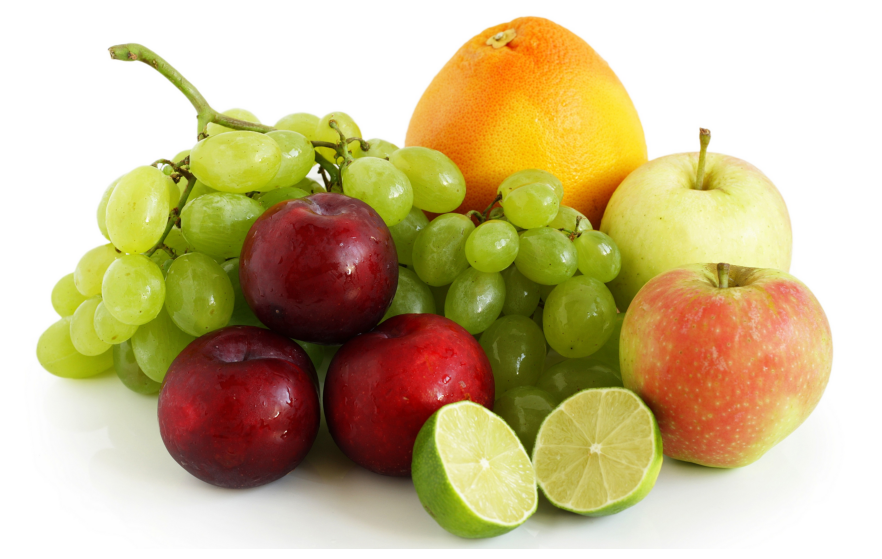

Размерность оригинальной картинки:  (2400, 3840, 3)


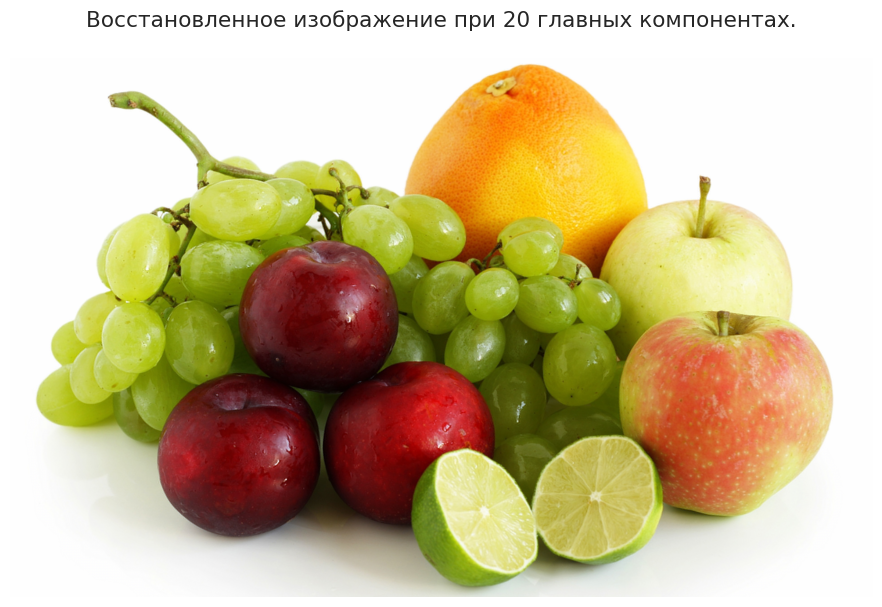

Размерность сжатой картинки:  (2400, 3840, 3)
Среднее изображение


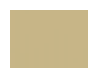

Главные компоненты


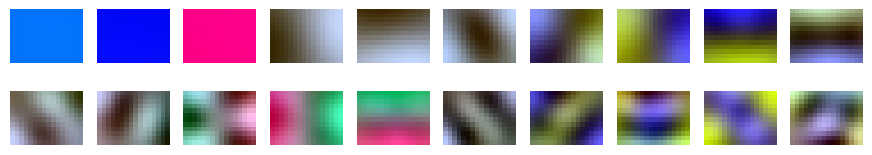

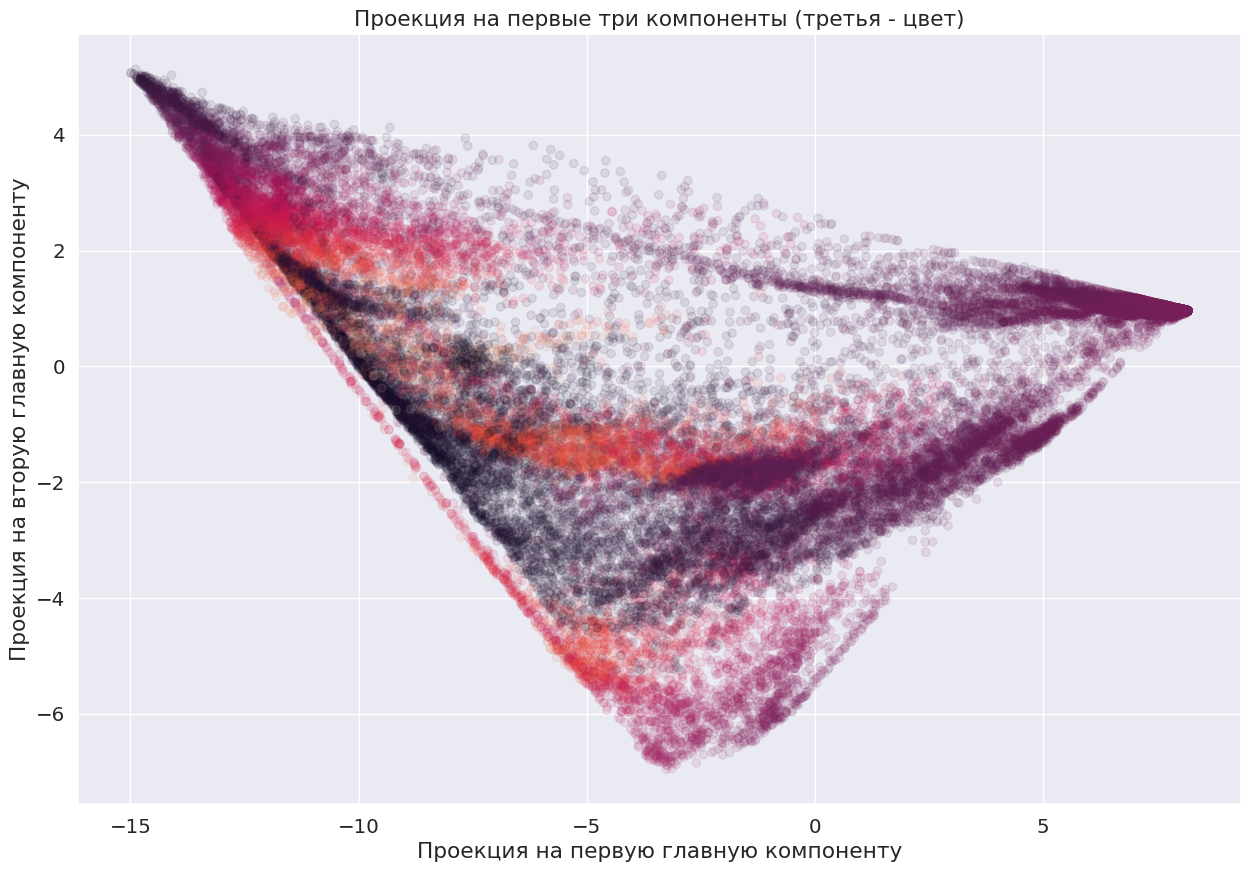

Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 6446640


In [112]:
image_pca(image, 12, 16)

Неплохо...

Но теперь самое интересное — давайте посмотрим, как будет меняться изображение в зависимости от разного числа компонент, которое мы выбираем.

Размерность оригинальной картинки:  (2400, 3840, 3)


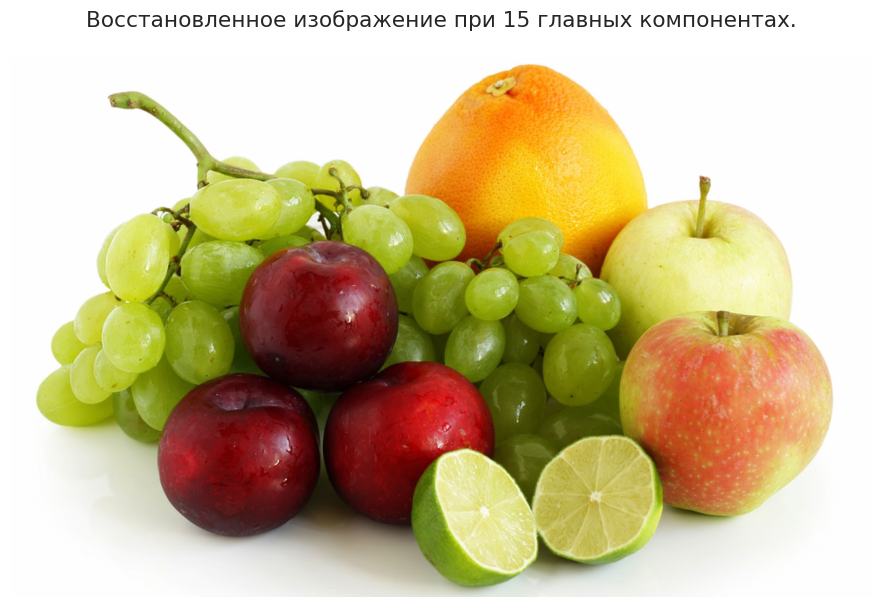

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 6058418
Размерность оригинальной картинки:  (2400, 3840, 3)


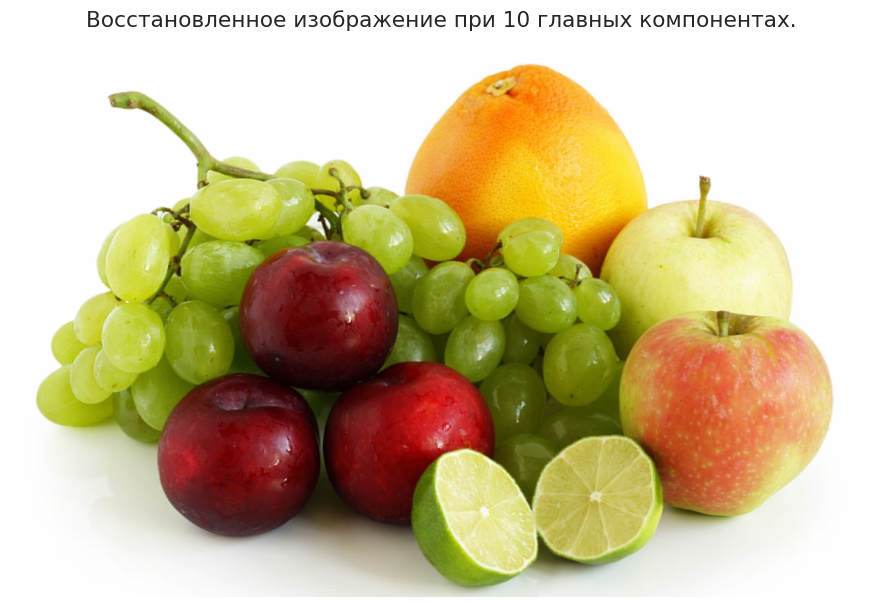

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 5462881
Размерность оригинальной картинки:  (2400, 3840, 3)


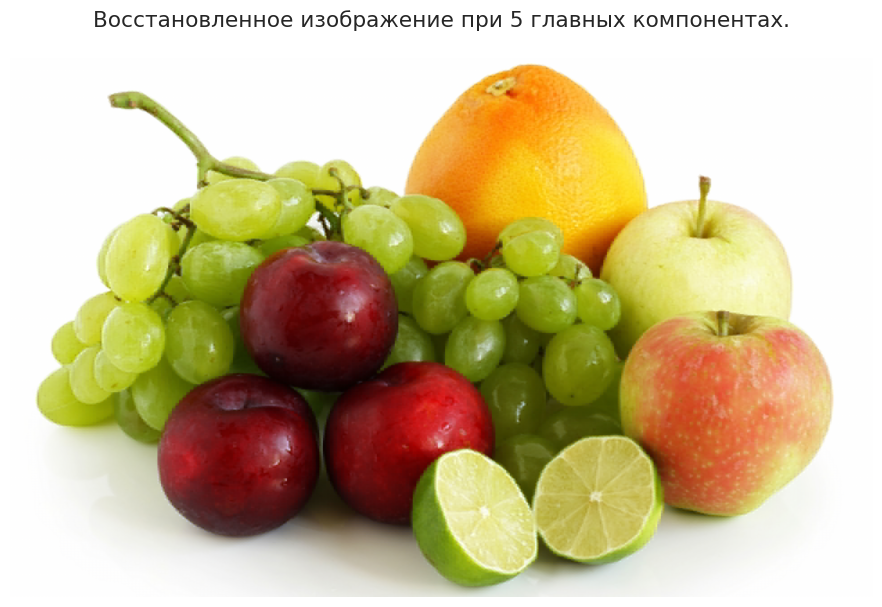

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 4461272
Размерность оригинальной картинки:  (2400, 3840, 3)


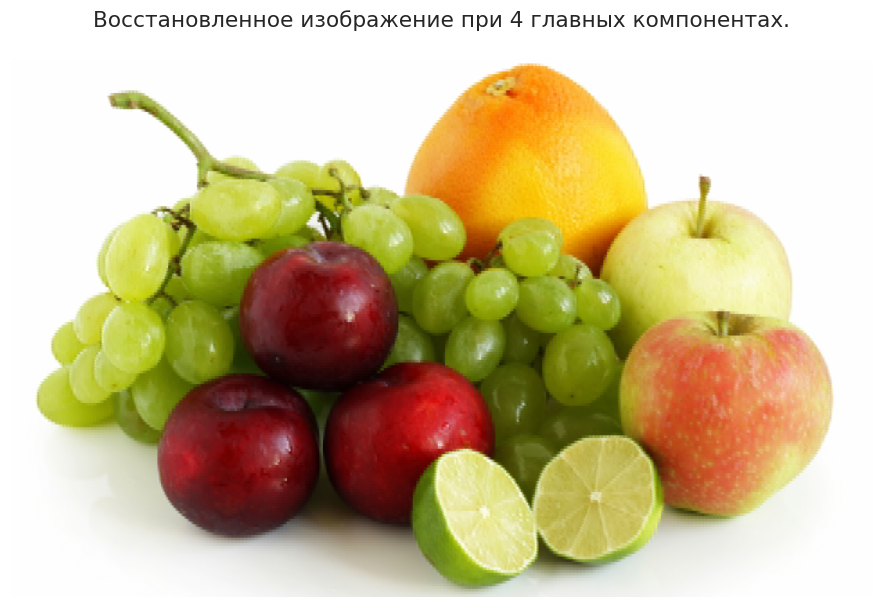

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 3336257
Размерность оригинальной картинки:  (2400, 3840, 3)


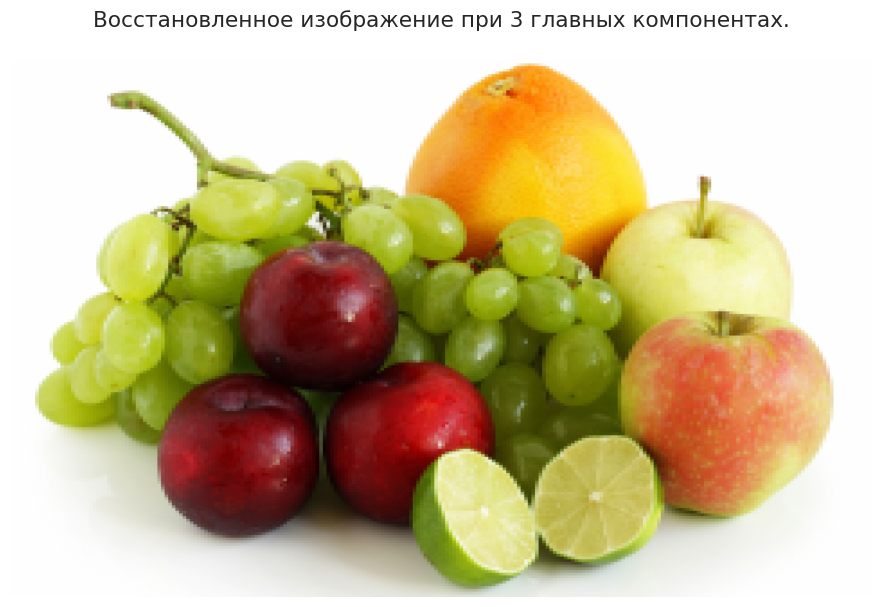

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 2124805
Размерность оригинальной картинки:  (2400, 3840, 3)


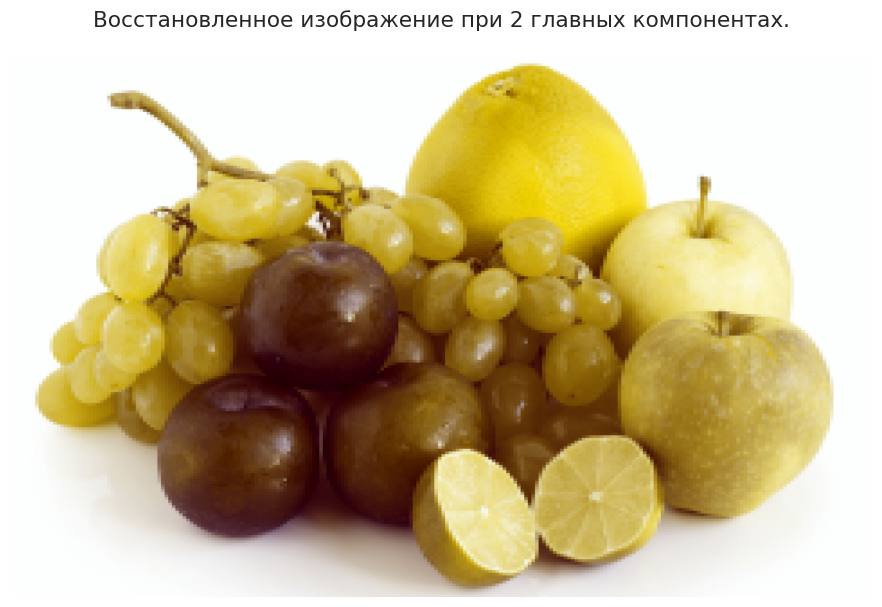

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 2011539
Размерность оригинальной картинки:  (2400, 3840, 3)


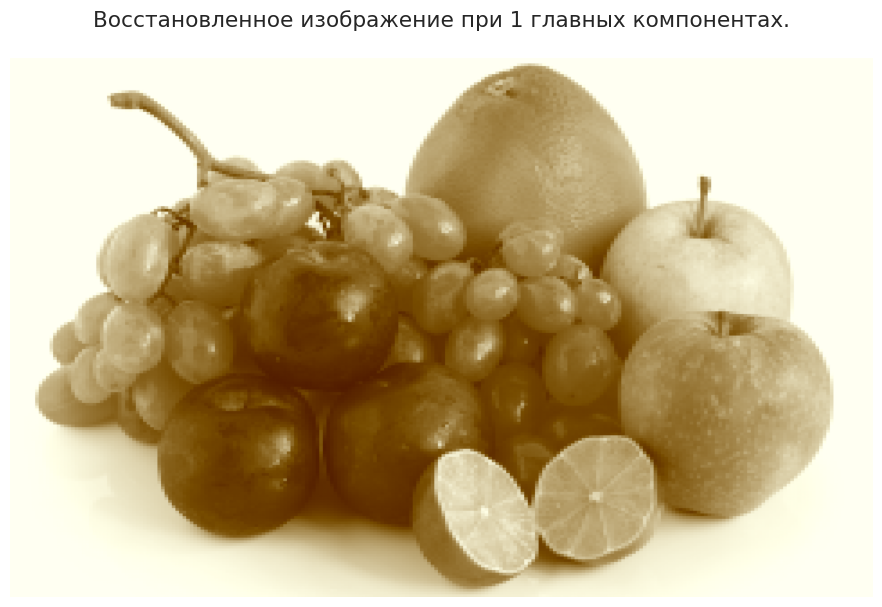

Размерность сжатой картинки:  (2400, 3840, 3)
Размер оригинального файла 8160907
27648000
27648000
Размер сжатого файла 1077515


In [113]:
for n_components in [15, 10, 5, 4, 3, 2, 1]:
    image_pca(
        image, 12, 16,
        n_components=n_components,
        draw_picture=False,
        draw_comp=False,
        visualization=False
    )

Выглядит мощно!.. Вот так вот можно производить сжатие изображений при помощи PCA.

Но на самом деле это можно делать не только с изображениями, но и со звуком, и с видео — ведь все эти данные можно представить как матрицы, а значит от нас будет требоваться только правильно выделить из этих матриц объекты и признаки — и тогда к ним точно так же можно будет легко применить PCA.

## Раздел 5. PCA для MNIST

Однако PCA нас интересует все же как способ уменьшения размерности данных, а не метод сжатия данных.

Поэтому предлагается применить его для решения задачи классификации на датасете MNIST, который представляет из себя изображения нарисованных от руки цифр. В качестве таргета в этом датасете выступают метки того, какая именно цифра нарисована — то есть, по сути, другими словами необходимо решить задачу многоклассовой классификации.

Скачаем тренировочные данные:

In [114]:
! wget https://www.dropbox.com/s/gq1tj9bzj8dkcul/mnist_train.csv

--2025-04-01 11:46:11--  https://www.dropbox.com/s/gq1tj9bzj8dkcul/mnist_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/hh6pv4b2xeqcx8maksrb6/mnist_train.csv?rlkey=d63eohid5ltm26c8jx2bhpxsg [following]
--2025-04-01 11:46:12--  https://www.dropbox.com/scl/fi/hh6pv4b2xeqcx8maksrb6/mnist_train.csv?rlkey=d63eohid5ltm26c8jx2bhpxsg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ca63ff4ce86292d191b263997.dl.dropboxusercontent.com/cd/0/inline/Cm8aHMaILWOgyoqCQseLIG-2uPlpK_SmDMDFRlL1CDvfMWut2eIquWJ8C_1qgL-ZqSrJJIlTJRD38epiiNmwVCWsw29s8jh0IK_03XiR8Rn0x-W-hn4gMO_SO7LNHW0dSzZrNuDqqjBaJe5AwyI4COta/file# [following]
--2025-04-01 11:46:12--  https://uc3ca63ff4ce86292d191b263997.dl.dropboxusercontent.com/cd/0

In [115]:
mnist_data_all = pd.read_csv('mnist_train.csv')

Посмотрим на данные. Что является таргетом и в какой колонке он находится?

In [116]:
mnist_data_all.head(10)

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   
5      2    0    0    0    0    0    0    0    0    0  ...      0      0   
6      1    0    0    0    0    0    0    0    0    0  ...      0      0   
7      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8      1    0    0    0    0    0    0    0    0    0  ...      0      0   
9      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  
5      0      0      0      0      0      0      0      0  
6      0      0      0      0      0      0      0      0  
7      0      0      0      0      0      0      0      0  
8      0      0      0      0      0      0      0      0  
9      0      0      0      0      0      0      0      0  

[10 rows x 785 columns]

Разделим данные на признаки и метки:

In [117]:
mnist_label = mnist_data_all['label']
mnist_data = mnist_data_all.drop(columns = ["label"])

Посмотрим на размер признаков:

In [118]:
mnist_data.shape

(60000, 784)

Почему их именно столько? Как это связано с обещанными картинками?


Выведем метку какого-нибудь элемента и отрисуем его при помощи функции `imshow` библиотеки `matplotlib`:

Label:  3


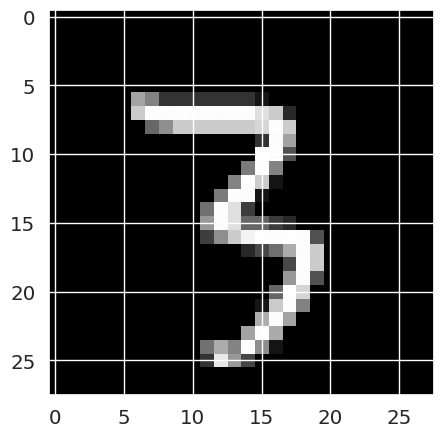

In [119]:
plt.figure(figsize=(6,5))

idx = 44

print("Label: ", mnist_label[idx])

# Необходимо выбрать объект, конвертировать его в numpy, а затем сделать reshape() в нужный размер
grid_data = mnist_data.iloc[idx].to_numpy().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

В нашем датасете каждый объект описывается 784 фичами. Как нам одним взглядом посмотреть на весь датасет?

К нам на помощь опять приходит PCA!

Создадим объект класса PCA с числом компонент, равным 2

In [120]:
pca = PCA(n_components=2)

Кстати, почему мы выбрали именно 2? Это не случайно. Что это поможет нам сделать?

Обучим PCA на наших признаках при помощи метода `fit`:

In [121]:
pca.fit(mnist_data)

PCA(n_components=2)

Трансформируем наш датасет в 2d при помощи метода `transform`:

In [122]:
mnist_data_2D = pca.transform(mnist_data)

Посмотрим на размер получившегося датасета:

In [123]:
mnist_data_2D.shape

(60000, 2)

А теперь сделаем осмысленную вещь с точки зрения нашей исходной задачи: отрисуем точки на плоскости при помощи функции `scatter` и зададим им цвет, согласно их классу, передав в аргумент `c=mnist_label`:

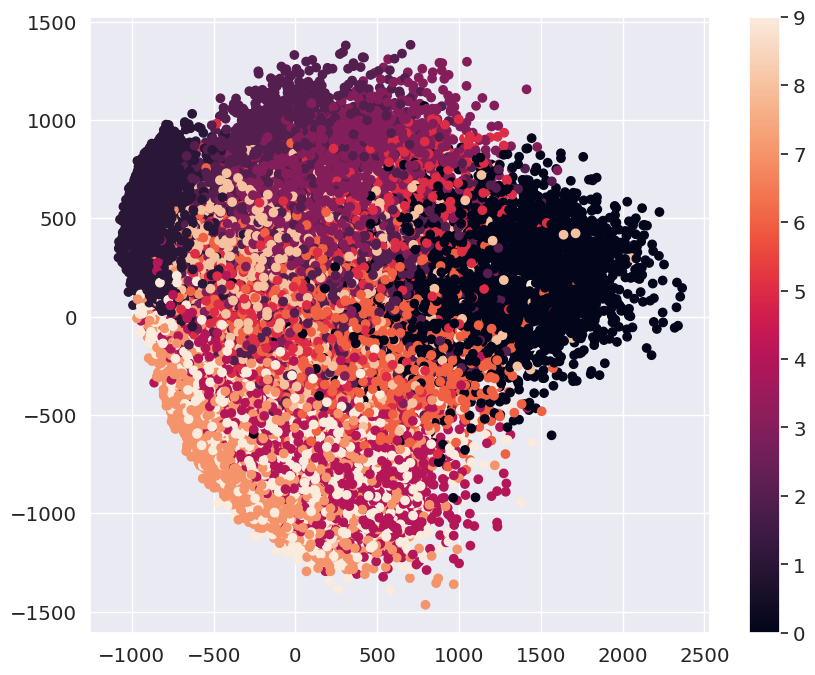

In [124]:
plt.figure(figsize=(10,8))

plt.scatter(mnist_data_2D[:,0], mnist_data_2D[:,1], c=mnist_label)

plt.colorbar()
plt.show()

Видно, что облака достаточно разделимые. Да и вообще, мощная картинка получается!

#### Вопрос

Кстати, а зачем вообще нам нужно уменьшать число признаков?



#### Пояснение

Нужно это потому, что имеется пресловутая для нас проблема под названием проклятие размерности. Но что же вообще значит это "проклятие" с точки зрения людей, которые работают с данными?

Большая размерность приводит к следующим проблемам:

*   Нужно много памяти.
*   Трудоемкие вычисления.
*   Все элементы выборки начинают находиться примерно на одинаковом расстоянии друг от друга!


Мы можем продемонстрировать, как большое число (зачастую шумовых) признаков влияет на работу алгоритма машинного обучения. Для этого мы решим задачу классификации на датасете MNIST с применением алгоритма PCA в качестве метода уменьшения размерности.

Скачаем тестовые данные и повторим аналогичные операции, как для train:

In [125]:
! wget https://www.dropbox.com/s/xuya93ez6ff712x/mnist_test.csv

--2025-04-01 11:50:16--  https://www.dropbox.com/s/xuya93ez6ff712x/mnist_test.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/3koezy3s53vexhaj4otov/mnist_test.csv?rlkey=yqkgtqkmjb6jwgrft0jterapt [following]
--2025-04-01 11:50:16--  https://www.dropbox.com/scl/fi/3koezy3s53vexhaj4otov/mnist_test.csv?rlkey=yqkgtqkmjb6jwgrft0jterapt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc3771c085ff88074babe66bb28.dl.dropboxusercontent.com/cd/0/inline/Cm-OCQMSDZAhHr8noLqbCyVUXa6dRNW2BZpvPg1UGjXTfKcqe1urGL3qHVc9foHXiJz5cEg3llgJhAmwJNDC9nie6rYDLEWLU9p6CeyHHt8wzisRJvPn77jfgQpDcHRazfy362WWLbtc1IJ0QNuUi4Qt/file# [following]
--2025-04-01 11:50:16--  https://ucc3771c085ff88074babe66bb28.dl.dropboxusercontent.com/cd/0/in

In [126]:
mnist_data_test_all = pd.read_csv('mnist_test.csv')

In [127]:
mnist_label_test = mnist_data_test_all['label']
mnist_data_test = mnist_data_test_all.drop(columns = ["label"])

In [128]:
mnist_data_test.shape

(10000, 784)

Будем решать данную задачу при помощи уже знакомого нам алгоритма k-ближайших соседей, поэтому импортируем этот алгоритм из `sklearn`


In [129]:
from sklearn.neighbors import KNeighborsClassifier

Теперь воспользуемся следующей функцией — она принимает тренировочный и тестовый датасет и число компонент в PCA, преобразуют данные, обучает модель и возвращает качество на тестовом датасете:

In [130]:
def reduce_and_learn(X_train, y_train, X_test, y_test, dim=2):
    pca = PCA(n_components=dim)

    pca.fit(X_train)
    X_train_dim_D = pca.transform(X_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_dim_D, y_train)

    X_test_dim_D = pca.transform(X_test)

    predict_quality = knn.score(X_test_dim_D, y_test)
    return predict_quality

В цикле по числу компонент, запускаем нашу функцию `reduce_and_learn` и сохраняем качество в массив `predicts_quality`

In [131]:
from tqdm import tqdm

dims = [2, 5, 10, 20, 40, 80, 160, 320, 640, 784]
predicts_quality = []

for dim in tqdm(dims):
    predicts_quality.append(reduce_and_learn(mnist_data, mnist_label, mnist_data_test, mnist_label_test, dim=dim))

100%|██████████| 10/10 [01:35<00:00,  9.52s/it]


Теперь, используя полученный массив, отрисуем зависимость качества от числа компонент в PCA:

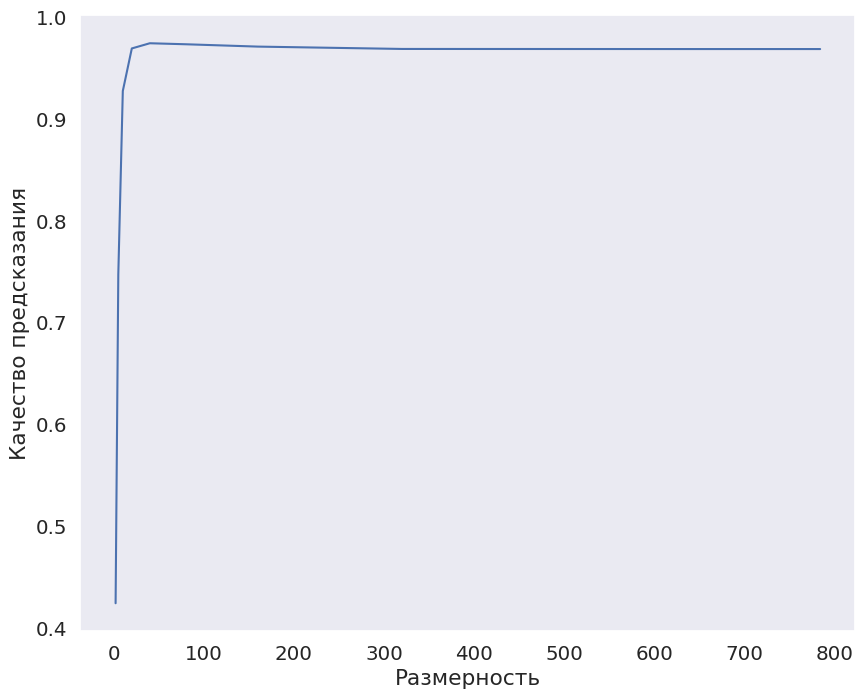

In [132]:
plt.figure(figsize=(10,8))

plt.plot(dims, predicts_quality)

plt.rc('font', size=12)
plt.xlabel('Размерность')
plt.ylabel('Качество предсказания')
plt.grid()
plt.show()

Выведем число компонент, при котором качество максимально, а также само значение качества

In [133]:
print(f"Лучшее качество при {dims[np.argmax(predicts_quality)]} компонентах")
print(f"Максимальное качество = {max(predicts_quality)}")

Лучшее качество при 40 компонентах
Максимальное качество = 0.9745


Мы получили не большой прирост (но все же прирост), но даже он может уменьшать убытки компании на миллионы. Кроме того, другие алгоритмы могут иметь бОльшую разницу в качестве, и такие эксперименты предлагаются слушателю в качестве упражнения.

Также, вы, возможно, заметили разницу в скорости работы алгоритмов с разным числом признаков. Часто скорость работы является одним из важнейших пунктов выбора алгоритма.